# IMDB Review Analysis Rnn

In the following notebook we will be analysing the dataset from IMDB.

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import imdb

(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
    path="imdb.npz", 
    num_words = None, 
    skip_top = 0, 
    maxlen = None, 
    seed = 113, 
    start_char = 1, 
    oov_char = 2, 
    index_from = 3)

Using TensorFlow backend.


17473536/17464789 [==============================] - 1s 0us/step


In [4]:
print("X_train type: ", type(X_train));
print("Y_train type: ", type(Y_train));
print("X_test type: ", type(X_test));
print("Y_test type: ", type(Y_test));


print("X_train shape: ", X_train.shape);
print("Y_train shape: ", Y_train.shape);
print("X_test shape: ", X_test.shape);
print("Y_test shape: ", Y_test.shape);



('X_train type: ', <type 'numpy.ndarray'>)
('Y_train type: ', <type 'numpy.ndarray'>)
('X_test type: ', <type 'numpy.ndarray'>)
('Y_test type: ', <type 'numpy.ndarray'>)
('X_train shape: ', (25000,))
('Y_train shape: ', (25000,))
('X_test shape: ', (25000,))
('Y_test shape: ', (25000,))


In [6]:
import numpy as np

print("Y Train values = ", np.unique(Y_train))
print("Y Test values = ", np.unique(Y_test))

print("Y Train distribution = ", np.unique(Y_train, return_counts = True))
print("Y Test distribution = ", np.unique(Y_test, return_counts = True))

('Y Train values = ', array([0, 1]))
('Y Test values = ', array([0, 1]))
('Y Train distribution = ', (array([0, 1]), array([12500, 12500])))
('Y Test distribution = ', (array([0, 1]), array([12500, 12500])))


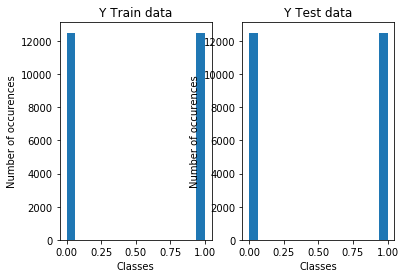

In [11]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(121)
plt.hist(Y_train, bins = 'auto')
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.title("Y Train data")

plt.subplot(122)
plt.hist(Y_test, bins = 'auto')
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.title("Y Test data")

plt.show()

In [19]:
print(X_train[0])

wordIndex = imdb.get_word_index()
indexWord = dict([(value, key) for (key, value) in wordIndex.items()])

for num in X_train[0]:
    index = num - 3
    if index in indexWord.keys():
        print(indexWord[index])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
this
film
was
just
brilliant
casting

In [20]:
print(" ".join(indexWord.get(i - 3, "!") for i in X_train[0]))

! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

## Training

In [21]:
print(max([max(sequence) for sequence in X_train]))

88586


In [22]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
    path="imdb.npz", 
    num_words = 10000)

print(max([max(sequence) for sequence in X_train]))

9999


In [23]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

for i in X_train[0:10]:
    print(len(i))

100
100
100
100
100
100
100
100
100
100


In [26]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import Activation

RNNModel = Sequential()

RNNModel.add(Embedding(10000, 32, input_length = 100))
RNNModel.add(SimpleRNN(32, input_shape = (10000, 100), return_sequences = False))
RNNModel.add(Dense(1))
RNNModel.add(Activation('sigmoid'))

RNNModel.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [28]:
RNNModel.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [29]:
RNNModel.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 3, batch_size = 64, verbose = 1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 11s 444us/step - loss: 0.5662 - acc: 0.6840 - val_loss: 0.4116 - val_acc: 0.8188
Epoch 2/3
25000/25000 [==============================] - 11s 446us/step - loss: 0.3438 - acc: 0.8577 - val_loss: 0.3567 - val_acc: 0.8462
Epoch 3/3
25000/25000 [==============================] - 12s 462us/step - loss: 0.2588 - acc: 0.8984 - val_loss: 0.3894 - val_acc: 0.8407


In [30]:
scores = RNNModel.evaluate(X_test, Y_test, verbose = 1)

25000/25000 [==============================] - 5s 193us/step


In [40]:
print("Accuracy %.2f%% " % (scores[1] * 100))

Accuracy 84.07% 
